In [594]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,6)
pd.options.display.float_format = "{:,.1f}".format
plt.style.use('seaborn-v0_8-ticks')

<h1>Loading Dataset</h1>

In [595]:
df = pd.read_csv(r"D:\nevinphilbert\Portfolio\Python Builder\World Expenditure Analysis\WorldExpenditures.csv")
df.head(5)

,Year,Country,Sector,Expenditure(million USD),GDP(%)
0,2000,Australia,Total function,"153,122.6",37.4
1,2000,Australia,"Agriculture, forestry, fishing and hunting","2,195.6",0.5
2,2000,Australia,"Mining, manufacturing and construction",905.0,0.2
3,2000,Australia,Transport,"11,417.4",2.8
4,2000,Australia,Fuel and energy,"2,251.2",0.5


<h1>Getting Overview of data, checking values & preparation for data cleaning</h1>

In [596]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25733 entries, 0 to 25732
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      25733 non-null  int64  
 1   Country                   25733 non-null  object 
 2   Sector                    25733 non-null  object 
 3   Expenditure(million USD)  25173 non-null  float64
 4   GDP(%)                    25173 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1005.3+ KB


In [597]:
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Rows: 25733
Columns: 5


In [598]:
df.describe()

,Year,Expenditure(million USD),GDP(%)
count,"25,733.0","25,173.0","25,173.0"
mean,"2,011.3","36,561.9",4.5
std,6.1,"246,497.2",9.8
min,"2,000.0",0.0,0.0
25%,"2,006.0",132.8,0.2
50%,"2,012.0","1,171.6",1.1
75%,"2,017.0","8,350.3",3.9
max,"2,021.0","10,476,081.8",131.4


In [600]:
#checking duplicates
df.duplicated(subset=['Year', 'Country', 'Sector']).sum()

0

<h2>World Expenditure Dataset from 2000 - 2021</h2>
<h3>Overview</h3>

<p>The World Expenditure dataset contains information on expenditure and GDP (%) for various countries across different sectors over multiple years. This documentation provides details about the columns present in the dataset.</p>

<h3>Columns</h3>
<ol>
    <li>
        <ul>
            <li>Year:</li>
            <li>Data Type: Integer</li>
            <li>Description: Represents the year in which the expenditure and GDP data were recorded.</li>
        </ul>
    </li>
    <li>
        <ul>
            <li>Country:</li>
            <li>Data Type: String</li>
            <li>Description: Indicates the name of the country for which expenditure and GDP data are reported.</li>
        </ul>
    </li>
    <li>
        <ul>
            <li>Sector:</li>
            <li>Data Type: String</li>
            <li>Description: Specifies the sector to which the expenditure pertains. Examples of sectors may include healthcare, education, defense, etc.</li>
        </ul>
    </li>
    <li>
        <ul>
            <li>Expenditure (million USD):</li>
            <li>Data Type: Float</li>
            <li>Description: Represents the expenditure amount in million USD for the corresponding country and sector.</li>
        </ul>
    </li>
    <li>
        <ul>
            <li>GDP (%):</li>
            <li>Data Type: Float</li>
            <li>Description: Indicates the GDP percentage for the corresponding country and sector. It represents the contribution of the sector's expenditure to the country's Gross Domestic Product (GDP) as a percentage.</li>
        </ul>
    </li>    
</ol>

<h3>Notes</h3>
    <p>The dataset contains records for multiple years, covering expenditure and GDP data for various countries and sectors.
    Expenditure values are reported in million USD. GDP (%) values represent the sector's contribution to the country's GDP as a percentage. Missing values may be present in the dataset, especially for certain countries and sectors. Careful consideration should be given to handling missing data during data analysis.</p>

In [541]:
df[df['Expenditure(million USD)'].isna() | df['GDP(%)'].isna()]

,Year,Country,Sector,Expenditure(million USD),GDP(%)
301,2000,Indonesia,Total function,NaN,NaN
302,2000,Indonesia,"Agriculture, forestry, fishing and hunting",NaN,NaN
303,2000,Indonesia,"Mining, manufacturing and construction",NaN,NaN
304,2000,Indonesia,Transport,NaN,NaN
305,2000,Indonesia,Communication,NaN,NaN
...,...,...,...,...,...
25501,2021,Serbia and Montenegro,"General economic, commercial and labour affairs",NaN,NaN
25502,2021,Serbia and Montenegro,Other industries,NaN,NaN
25503,2021,Serbia and Montenegro,RandD Economic affairs,NaN,NaN
25504,2021,Serbia and Montenegro,Economic affairs n.e.c.,NaN,NaN


In [542]:
df.groupby('Country').apply(lambda x: x.isna().sum())

,Year,Country,Sector,Expenditure(million USD),GDP(%)
Country,,,,,
Afghanistan,0,0,0,0,0
Albania,0,0,0,0,0
Armenia,0,0,0,0,0
Australia,0,0,0,0,0
Austria,0,0,0,0,0
...,...,...,...,...,...
United Kingdom,0,0,0,0,0
United States of America,0,0,0,0,0
Uzbekistan,0,0,0,0,0


In [543]:
#let's narrow it down to only countries that has null values
df[df.isna().any(axis=1)].groupby('Country').apply(lambda x: x.isna().sum())

,Year,Country,Sector,Expenditure(million USD),GDP(%)
Country,,,,,
Indonesia,0,0,0,60,60
Serbia,0,0,0,160,160
Serbia and Montenegro,0,0,0,280,280
Timor-Leste,0,0,0,60,60


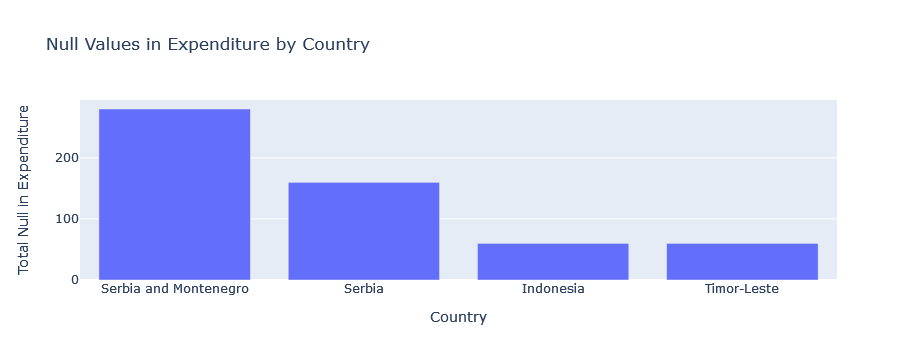

In [544]:
null_values_expenditure_by_country = df[df['Expenditure(million USD)'].isnull()].groupby('Country').size().reset_index(name='Null_Count').sort_values(by='Null_Count', ascending=False)
fig = px.bar(null_values_expenditure_by_country, x='Country', y='Null_Count', title='Null Values in Expenditure by Country')
fig.update_xaxes(title='Country')
fig.update_yaxes(title='Total Null in Expenditure')
fig.show()

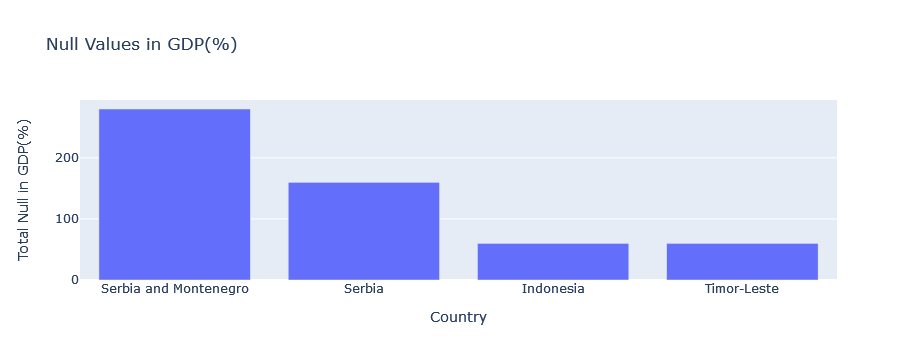

In [545]:
null_values_gdp_by_country = df[df['GDP(%)'].isna()].groupby('Country').size().reset_index(name='Null_Count').sort_values(by='Null_Count', ascending=False)
fig = px.bar(null_values_gdp_by_country, x='Country', y='Null_Count', title='Null Values in GDP(%)')
fig.update_xaxes(title='Country')
fig.update_yaxes(title='Total Null in GDP(%)')
fig.show()

<h5>Null Count in Expenditure and GDP</h5>

| Country              | Null Count |
|----------------------|------------|
| Serbia and Montenegro| 280        |
| Serbia               | 160        |
| Indonesia            | 60         |
| Timor-Leste          | 60         |

<h1>Data Cleaning</h1>

<h5><b>let's start from the largest one first, Serbia and Montenegro</b></h5>

In [546]:
serbia_montenegro = df[df['Country'].isin(['Serbia and Montenegro'])]
serbia_montenegro[serbia_montenegro.notna().all(axis=1)]

,Year,Country,Sector,Expenditure(million USD),GDP(%)
7751,2007,Serbia and Montenegro,Total function,"18,066.6",35.3
7752,2007,Serbia and Montenegro,Environment protection,141.8,0.3
7753,2007,Serbia and Montenegro,Housing and community amenities,792.9,1.5
7754,2007,Serbia and Montenegro,Health,"2,612.1",5.1
7755,2007,Serbia and Montenegro,Education,"1,682.2",3.3
7756,2007,Serbia and Montenegro,Social protection,"6,286.8",12.3
7757,2007,Serbia and Montenegro,General public services,"1,690.8",3.3
7758,2007,Serbia and Montenegro,Defence,"1,007.0",2.0
7759,2007,Serbia and Montenegro,Public order and safety,"1,118.5",2.2
7760,2007,Serbia and Montenegro,"Recreation, culture and religion",431.7,0.8


In [547]:
serbia_montenegro.describe()

,Year,Expenditure(million USD),GDP(%)
count,290.0,10.0,10.0
mean,"2,014.2","3,383.1",6.6
std,4.2,"5,447.6",10.6
min,"2,007.0",141.8,0.3
25%,"2,011.0",846.4,1.7
50%,"2,014.0","1,400.4",2.7
75%,"2,018.0","2,381.8",4.7
max,"2,021.0","18,066.6",35.3


<p>Serbia and Montenegro only reported their expenditure details in 2007. Due to the significant null count in the 'Expenditure' and 'GDP' column for Serbia and Montenegro, it was decided to drop the corresponding rows to prevent bias and ensure the integrity of the analysis.</p>

In [548]:
df.drop(serbia_montenegro.index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [549]:
#check to see if it's dropped
df[df['Country'].isin(['Serbia and Montenegro'])]

,Year,Country,Sector,Expenditure(million USD),GDP(%)


<h5><b>Serbia</b></h5>

In [550]:
serbia = df[df['Country'].isin(['Serbia'])]
serbia[serbia.notna().all(axis=1)]

,Year,Country,Sector,Expenditure(million USD),GDP(%)
8807,2008,Serbia,Total function,"22,332.1",38.9
8808,2008,Serbia,Environment protection,177.8,0.3
8809,2008,Serbia,Housing and community amenities,943.3,1.6
8810,2008,Serbia,Health,"3,068.5",5.3
8811,2008,Serbia,Education,"2,234.2",3.9
8812,2008,Serbia,Social protection,"8,334.6",14.5
8813,2008,Serbia,General public services,"1,922.7",3.4
8814,2008,Serbia,Defence,"1,223.9",2.1
8815,2008,Serbia,Public order and safety,"1,241.1",2.2
8816,2008,Serbia,"Recreation, culture and religion",512.1,0.9


In [551]:
pd.set_option('display.max_rows', 60)

In [552]:
#checking serbia data
serbia.describe()

,Year,Expenditure(million USD),GDP(%)
count,220.0,60.0,60.0
mean,"2,005.3","3,165.3",6.1
std,3.7,"5,475.0",10.5
min,"2,000.0",17.9,0.0
25%,"2,002.0",453.4,0.9
50%,"2,005.0","1,220.1",2.1
75%,"2,008.0","2,278.7",4.4
max,"2,012.0","22,332.1",38.9


In [553]:
#let's try to compare it with other balkans country
albania = df[df['Country'].isin(['Albania'])]
#albania[albania.notna().all(axis=1)]

In [554]:
albania.describe()

,Year,Expenditure(million USD),GDP(%)
count,276.0,276.0,276.0
mean,"2,013.7",433.2,3.4
std,4.9,912.7,7.0
min,"2,005.0",0.0,0.0
25%,"2,011.0",6.2,0.0
50%,"2,014.0",105.5,0.8
75%,"2,018.0",373.6,3.1
max,"2,021.0","5,737.2",32.5


<p>Serbia only reported their expenditure details from 2000 to 2012. Due to the significant null count in the 'Expenditure' and 'GDP' column for Serbia, it was decided to drop the corresponding rows to prevent bias and ensure the integrity of the analysis.</p>

In [555]:
df.drop(serbia.index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [556]:
df[df['Country'].isin(['Serbia'])]

,Year,Country,Sector,Expenditure(million USD),GDP(%)


<h5><b>Indonesia</b></h5>

In [557]:
indonesia = df[df['Country'].isin(['Indonesia'])]
indonesia[indonesia.notna().all(axis=1)]

,Year,Country,Sector,Expenditure(million USD),GDP(%)
8242,2008,Indonesia,Total function,"108,259.0",19.9
8243,2008,Indonesia,Environment protection,"1,527.3",0.3
8244,2008,Indonesia,Housing and community amenities,"9,242.2",1.7
8245,2008,Indonesia,Health,"6,386.4",1.2
8246,2008,Indonesia,Education,"12,359.7",2.3
...,...,...,...,...,...
24593,2021,Indonesia,Social protection,"20,477.5",1.7
24594,2021,Indonesia,General public services,"65,133.7",5.5
24595,2021,Indonesia,Defence,"8,792.1",0.7
24596,2021,Indonesia,Public order and safety,"12,443.5",1.0


In [558]:
indonesia[indonesia['Expenditure(million USD)'].isnull()]

,Year,Country,Sector,Expenditure(million USD),GDP(%)
301,2000,Indonesia,Total function,NaN,NaN
302,2000,Indonesia,"Agriculture, forestry, fishing and hunting",NaN,NaN
303,2000,Indonesia,"Mining, manufacturing and construction",NaN,NaN
304,2000,Indonesia,Transport,NaN,NaN
305,2000,Indonesia,Communication,NaN,NaN
306,2000,Indonesia,Fuel and energy,NaN,NaN
307,2000,Indonesia,Environment protection,NaN,NaN
308,2000,Indonesia,Housing and community amenities,NaN,NaN
309,2000,Indonesia,Health,NaN,NaN
310,2000,Indonesia,Education,NaN,NaN


In [561]:
indonesia[indonesia['GDP(%)'].isnull()]

,Year,Country,Sector,Expenditure(million USD),GDP(%)
301,2000,Indonesia,Total function,NaN,NaN
302,2000,Indonesia,"Agriculture, forestry, fishing and hunting",NaN,NaN
303,2000,Indonesia,"Mining, manufacturing and construction",NaN,NaN
304,2000,Indonesia,Transport,NaN,NaN
305,2000,Indonesia,Communication,NaN,NaN
306,2000,Indonesia,Fuel and energy,NaN,NaN
307,2000,Indonesia,Environment protection,NaN,NaN
308,2000,Indonesia,Housing and community amenities,NaN,NaN
309,2000,Indonesia,Health,NaN,NaN
310,2000,Indonesia,Education,NaN,NaN


In [562]:
indonesia.describe()

,Year,Expenditure(million USD),GDP(%)
count,200.0,140.0,140.0
mean,"2,010.5","30,073.6",3.3
std,7.1,"48,898.4",5.3
min,"2,000.0",524.6,0.1
25%,"2,002.0","2,360.1",0.3
50%,"2,011.5","10,162.9",1.1
75%,"2,016.2","28,066.3",3.0
max,"2,021.0","225,046.7",19.9


Since Indonesia has null values only from the years 2000 to 2002, we can proceed by dropping the rows corresponding to these years from the Indonesia dataset.

In [563]:
#let's filter the indonesia into only ones that has null values
indonesia = indonesia[indonesia['Expenditure(million USD)'].isnull() | indonesia['GDP(%)'].isnull()]
df.drop(indonesia.index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [565]:
df[df['Country'].isin(['Indonesia'])]

,Year,Country,Sector,Expenditure(million USD),GDP(%)
8182,2008,Indonesia,Total function,"108,259.0",19.9
8183,2008,Indonesia,Environment protection,"1,527.3",0.3
8184,2008,Indonesia,Housing and community amenities,"9,242.2",1.7
8185,2008,Indonesia,Health,"6,386.4",1.2
8186,2008,Indonesia,Education,"12,359.7",2.3
...,...,...,...,...,...
24533,2021,Indonesia,Social protection,"20,477.5",1.7
24534,2021,Indonesia,General public services,"65,133.7",5.5
24535,2021,Indonesia,Defence,"8,792.1",0.7
24536,2021,Indonesia,Public order and safety,"12,443.5",1.0


<h5><b>Timor Leste</b></h5>

In [567]:
tl = df[df['Country'].isin(['Timor-Leste'])]
tl[tl.notna().all(axis=1)]

,Year,Country,Sector,Expenditure(million USD),GDP(%)
10985,2010,Timor-Leste,Total function,"1,020.2",115.7
12151,2011,Timor-Leste,Total function,"1,369.5",131.4
13359,2012,Timor-Leste,Total function,"1,456.4",125.5
13360,2012,Timor-Leste,Environment protection,2.4,0.2
13361,2012,Timor-Leste,Housing and community amenities,20.1,1.7
13362,2012,Timor-Leste,Health,53.3,4.6
13363,2012,Timor-Leste,Education,109.0,9.4
13364,2012,Timor-Leste,Social protection,160.5,13.8
13365,2012,Timor-Leste,General public services,178.2,15.4
13366,2012,Timor-Leste,Defence,39.9,3.4


In [571]:
tl[tl['Expenditure(million USD)'].isnull()]

,Year,Country,Sector,Expenditure(million USD),GDP(%)
696,2000,Timor-Leste,Total function,NaN,NaN
697,2000,Timor-Leste,"Agriculture, forestry, fishing and hunting",NaN,NaN
698,2000,Timor-Leste,"Mining, manufacturing and construction",NaN,NaN
699,2000,Timor-Leste,Transport,NaN,NaN
700,2000,Timor-Leste,Communication,NaN,NaN
701,2000,Timor-Leste,Fuel and energy,NaN,NaN
702,2000,Timor-Leste,Environment protection,NaN,NaN
703,2000,Timor-Leste,Housing and community amenities,NaN,NaN
704,2000,Timor-Leste,Health,NaN,NaN
705,2000,Timor-Leste,Education,NaN,NaN


In [570]:
tl[tl['GDP(%)'].isnull()]

,Year,Country,Sector,Expenditure(million USD),GDP(%)
696,2000,Timor-Leste,Total function,NaN,NaN
697,2000,Timor-Leste,"Agriculture, forestry, fishing and hunting",NaN,NaN
698,2000,Timor-Leste,"Mining, manufacturing and construction",NaN,NaN
699,2000,Timor-Leste,Transport,NaN,NaN
700,2000,Timor-Leste,Communication,NaN,NaN
701,2000,Timor-Leste,Fuel and energy,NaN,NaN
702,2000,Timor-Leste,Environment protection,NaN,NaN
703,2000,Timor-Leste,Housing and community amenities,NaN,NaN
704,2000,Timor-Leste,Health,NaN,NaN
705,2000,Timor-Leste,Education,NaN,NaN


Since Timor Leste only has null values from the years 2000 to 2002, we can proceed by dropping the rows corresponding to these years from the dataset.

In [573]:
tl = tl[tl['Expenditure(million USD)'].isnull() | tl['GDP(%)'].isnull()]
tl

,Year,Country,Sector,Expenditure(million USD),GDP(%)
696,2000,Timor-Leste,Total function,NaN,NaN
697,2000,Timor-Leste,"Agriculture, forestry, fishing and hunting",NaN,NaN
698,2000,Timor-Leste,"Mining, manufacturing and construction",NaN,NaN
699,2000,Timor-Leste,Transport,NaN,NaN
700,2000,Timor-Leste,Communication,NaN,NaN
701,2000,Timor-Leste,Fuel and energy,NaN,NaN
702,2000,Timor-Leste,Environment protection,NaN,NaN
703,2000,Timor-Leste,Housing and community amenities,NaN,NaN
704,2000,Timor-Leste,Health,NaN,NaN
705,2000,Timor-Leste,Education,NaN,NaN


In [574]:
df.drop(tl.index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [575]:
df[df['Country'].isin(['Timor-Leste'])]

,Year,Country,Sector,Expenditure(million USD),GDP(%)
10925,2010,Timor-Leste,Total function,"1,020.2",115.7
12091,2011,Timor-Leste,Total function,"1,369.5",131.4
13299,2012,Timor-Leste,Total function,"1,456.4",125.5
13300,2012,Timor-Leste,Environment protection,2.4,0.2
13301,2012,Timor-Leste,Housing and community amenities,20.1,1.7
13302,2012,Timor-Leste,Health,53.3,4.6
13303,2012,Timor-Leste,Education,109.0,9.4
13304,2012,Timor-Leste,Social protection,160.5,13.8
13305,2012,Timor-Leste,General public services,178.2,15.4
13306,2012,Timor-Leste,Defence,39.9,3.4


In [662]:
df.isna().sum()

Year                          0
Country                       0
Sector                        0
Expenditure(million USD)    560
GDP(%)                      560
dtype: int64

<h5><b>Saving the cleaned dataset</b></h5>

In [663]:
df.to_csv(r"D:\nevinphilbert\Portfolio\Python Builder\World Expenditure Analysis\WorldExpendituresCleaned.csv", index=False)

<h1>Exploratory Data Analysis</h1>

In [609]:
df_groupby_country = df.groupby('Country').agg({
    'Year': 'nunique',  # Count the number of years for each country (optional)
    'Expenditure(million USD)': 'sum',  # Sum of expenditure for each country
    'GDP(%)': 'mean'  # Mean GDP percentage for each country
})
df_groupby_country

,Year,Expenditure(million USD),GDP(%)
Country,,,
Afghanistan,12,"234,106.4",8.9
Albania,16,"119,566.7",3.4
Armenia,18,"70,173.2",5.3
Australia,22,"19,186,833.5",4.1
Austria,22,"8,415,252.2",5.4
...,...,...,...
United Kingdom,22,"48,771,125.2",4.5
United States of America,22,"262,767,216.9",7.4
Uzbekistan,8,"210,002.7",4.7


In [620]:
country = df_groupby_country[df_groupby_country['Year'] >= 22].reset_index()
country

,Country,Year,Expenditure(million USD),GDP(%)
0,Australia,22,"19,186,833.5",4.1
1,Austria,22,"8,415,252.2",5.4
2,Belgium,22,"10,479,205.7",5.7
3,Bulgaria,22,"781,113.2",4.3
4,"China, Macao SAR",22,"222,220.0",3.5
5,Croatia,22,"146,074.6",0.7
6,Cyprus,22,"384,936.2",4.2
7,Czechia,22,"3,474,116.3",4.5
8,Denmark,22,"7,017,374.9",5.6
9,Estonia,22,"358,935.5",4.1


In [622]:
country_cons = country['Country'].values
country_cons

array(['Australia', 'Austria', 'Belgium', 'Bulgaria', 'China, Macao SAR',
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland',
       'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Maldives', 'Malta', 'Mongolia', 'Netherlands (Kingdom of the)',
       'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania',
       'Russian Federation', 'Singapore', 'Slovakia', 'Slovenia',
       'South Africa', 'Spain', 'Sweden', 'Switzerland, Liechtenstein',
       'Thailand', 'United Kingdom', 'United States of America'],
      dtype=object)

In [629]:
df_use = df[df['Country'].isin(country_cons)]
df_use.reset_index(drop=True, inplace=True)
df_use

,Year,Country,Sector,Expenditure(million USD),GDP(%)
0,2000,Australia,Total function,"153,122.6",37.4
1,2000,Australia,"Agriculture, forestry, fishing and hunting","2,195.6",0.5
2,2000,Australia,"Mining, manufacturing and construction",905.0,0.2
3,2000,Australia,Transport,"11,417.4",2.8
4,2000,Australia,Fuel and energy,"2,251.2",0.5
...,...,...,...,...,...
16249,2021,United States of America,Social protection,"2,827,585.1",12.1
16250,2021,United States of America,General public services,"1,291,640.2",5.5
16251,2021,United States of America,Defence,"759,322.0",3.2
16252,2021,United States of America,Public order and safety,"459,973.2",2.0


In [645]:
df_use.describe()

,Year,Expenditure(million USD),GDP(%)
count,"16,254.0","16,254.0","16,254.0"
mean,"2,010.7","41,234.3",4.6
std,6.3,"279,288.3",9.9
min,"2,000.0",0.0,0.0
25%,"2,005.0",209.5,0.2
50%,"2,011.0","1,521.8",1.0
75%,"2,016.0","10,251.4",4.0
max,"2,021.0","10,476,081.8",74.5


<h5><b>Doing some cleaning over sector, removing total function as it is the combination of the other 19 sectors and it is easier to drop rows that has it instead of excluding it for every analysis</b></h5>

In [664]:
unique = df_use['Sector'].unique()
df_unique = pd.DataFrame({'Sector': unique})
df_unique

,Sector
0,Total function
1,"Agriculture, forestry, fishing and hunting"
2,"Mining, manufacturing and construction"
3,Transport
4,Fuel and energy
...,...
15,Other industries
16,RandD Economic affairs
17,Economic affairs n.e.c.
18,Communication


In [665]:
df_unique = df_unique[df_unique['Sector'] != 'Total function']
df_unique.reset_index(drop=True, inplace=True)
df_unique

,Sector
0,"Agriculture, forestry, fishing and hunting"
1,"Mining, manufacturing and construction"
2,Transport
3,Fuel and energy
4,Environment protection
...,...
14,Other industries
15,RandD Economic affairs
16,Economic affairs n.e.c.
17,Communication


In [666]:
df_use = df_use[df_use['Sector'] != 'Total function']
df_use.reset_index(drop=True, inplace=True)
df_use

,Year,Country,Sector,Expenditure(million USD),GDP(%)
0,2000,Australia,"Agriculture, forestry, fishing and hunting","2,195.6",0.5
1,2000,Australia,"Mining, manufacturing and construction",905.0,0.2
2,2000,Australia,Transport,"11,417.4",2.8
3,2000,Australia,Fuel and energy,"2,251.2",0.5
4,2000,Australia,Environment protection,"2,051.8",0.5
...,...,...,...,...,...
15303,2021,United States of America,Social protection,"2,827,585.1",12.1
15304,2021,United States of America,General public services,"1,291,640.2",5.5
15305,2021,United States of America,Defence,"759,322.0",3.2
15306,2021,United States of America,Public order and safety,"459,973.2",2.0


In [667]:
df = df_use
df

,Year,Country,Sector,Expenditure(million USD),GDP(%)
0,2000,Australia,"Agriculture, forestry, fishing and hunting","2,195.6",0.5
1,2000,Australia,"Mining, manufacturing and construction",905.0,0.2
2,2000,Australia,Transport,"11,417.4",2.8
3,2000,Australia,Fuel and energy,"2,251.2",0.5
4,2000,Australia,Environment protection,"2,051.8",0.5
...,...,...,...,...,...
15303,2021,United States of America,Social protection,"2,827,585.1",12.1
15304,2021,United States of America,General public services,"1,291,640.2",5.5
15305,2021,United States of America,Defence,"759,322.0",3.2
15306,2021,United States of America,Public order and safety,"459,973.2",2.0


In [668]:
df.describe()

,Year,Expenditure(million USD),GDP(%)
count,"15,308.0","15,308.0","15,308.0"
mean,"2,010.7","21,362.4",2.4
std,6.3,"106,713.1",3.8
min,"2,000.0",0.0,0.0
25%,"2,005.0",184.1,0.2
50%,"2,011.0","1,222.9",0.9
75%,"2,016.0","7,541.6",2.8
max,"2,021.0","2,827,585.1",27.1


<h5><b>Now we can do our EDA with more ease</b></h5>

In [673]:
df['Expenditure(million USD)'].describe()

count      15,308.0
mean       21,362.4
std       106,713.1
min             0.0
25%           184.1
50%         1,222.9
75%         7,541.6
max     2,827,585.1
Name: Expenditure(million USD), dtype: float64

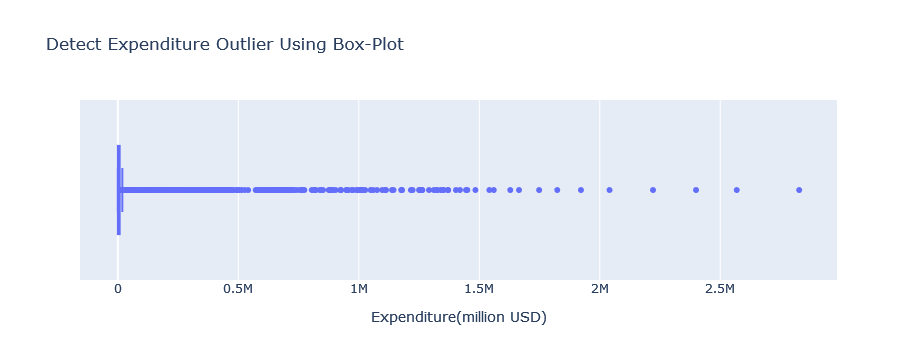

In [672]:
fig = px.box(df, x="Expenditure(million USD)", title="Detect Expenditure Outlier Using Box-Plot")
fig.show()

this is interesting, i want to see who and what kind of stuff they're doing with that much fund

In [682]:
pd.set_option('display.max_rows', None)
df[df['Expenditure(million USD)'] >= 500000].sort_values(by='Expenditure(million USD)', ascending=False)

,Year,Country,Sector,Expenditure(million USD),GDP(%)
15303,2021,United States of America,Social protection,"2,827,585.1",12.1
14600,2020,United States of America,Social protection,"2,568,403.2",12.1
15301,2021,United States of America,Health,"2,399,530.2",10.2
14598,2020,United States of America,Health,"2,221,081.4",10.5
13874,2019,United States of America,Health,"2,040,519.4",9.5
13151,2018,United States of America,Health,"1,921,968.3",9.3
12425,2017,United States of America,Health,"1,823,545.6",9.3
11705,2016,United States of America,Health,"1,748,282.3",9.3
10985,2015,United States of America,Health,"1,664,821.3",9.1
13876,2019,United States of America,Social protection,"1,628,513.9",7.6


In [683]:
df['GDP(%)'].describe()

count   15,308.0
mean         2.4
std          3.8
min          0.0
25%          0.2
50%          0.9
75%          2.8
max         27.1
Name: GDP(%), dtype: float64

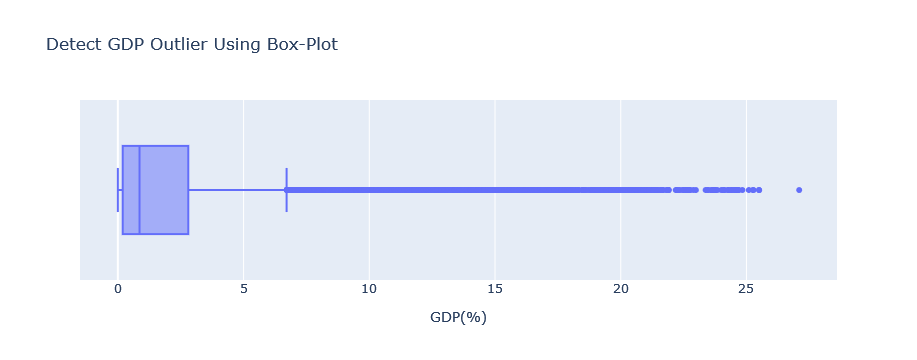

In [684]:
fig = px.box(df, x="GDP(%)", title="Detect GDP Outlier Using Box-Plot")
fig.show()

In [685]:
df[df['GDP(%)'] >= 6.7].sort_values(by='GDP(%)', ascending=False)

,Year,Country,Sector,Expenditure(million USD),GDP(%)
14079,2020,France,Social protection,"716,872.0",27.1
14061,2020,Finland,Social protection,"69,343.9",25.5
11170,2016,Finland,Social protection,"61,351.2",25.5
10444,2015,Finland,Social protection,"59,262.4",25.3
9721,2014,Finland,Social protection,"69,326.5",25.3
14221,2020,Italy,Social protection,"475,917.7",25.1
6906,2010,Denmark,Social protection,"79,972.4",24.8
7596,2011,Denmark,Social protection,"84,943.7",24.7
14802,2021,France,Social protection,"732,100.9",24.7
14784,2021,Finland,Social protection,"73,300.3",24.7
